In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('Breast_cancer_data[1].csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [3]:
#adding a new column for the line intercept and initializing with ones
#inserting a new column as first column
# df.insert(loc=0,column='theta0',value=1)
# df
df = np.array(df)
np.random.shuffle(df)
df

array([[1.122e+01, 3.381e+01, 7.079e+01, 3.868e+02, 7.780e-02, 1.000e+00],
       [1.404e+01, 1.598e+01, 8.978e+01, 6.112e+02, 8.458e-02, 1.000e+00],
       [1.534e+01, 1.426e+01, 1.025e+02, 7.044e+02, 1.073e-01, 0.000e+00],
       ...,
       [1.194e+01, 2.076e+01, 7.787e+01, 4.410e+02, 8.605e-02, 1.000e+00],
       [1.674e+01, 2.159e+01, 1.101e+02, 8.695e+02, 9.610e-02, 0.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, 1.265e+03, 1.178e-01, 0.000e+00]])

In [4]:
#splitting the dataset into training and testing set
r = df.shape[0]
c = df.shape[1]
#df = np.array(df)
idx = 8*r//10
x_train = df[:idx,:c-1]
y_train = df[:idx,-1]
x_test  = df[idx:,:c-1]
y_test  = df[idx:,-1]
print("x training data:")
print(x_train,end="\n\n")
print("y training data:")
print(y_train,end="\n\n")
print("x testing data:")
print(x_test,end="\n\n")
print("y testing data:")
print(y_test)

x training data:
[[1.122e+01 3.381e+01 7.079e+01 3.868e+02 7.780e-02]
 [1.404e+01 1.598e+01 8.978e+01 6.112e+02 8.458e-02]
 [1.534e+01 1.426e+01 1.025e+02 7.044e+02 1.073e-01]
 ...
 [1.296e+01 1.829e+01 8.418e+01 5.252e+02 7.351e-02]
 [2.201e+01 2.190e+01 1.472e+02 1.482e+03 1.063e-01]
 [1.476e+01 1.474e+01 9.487e+01 6.687e+02 8.875e-02]]

y training data:
[1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.

In [5]:
#normalizing the data
for c in range(x_train.shape[1]):
    if c!='theta0':
        min_train = np.min(x_train[:,c])
        max_train = np.max(x_train[:,c])
        x_train[:,c]=(x_train[:,c]-min_train)/(max_train-min_train)
        x_test[:,c]=(x_test[:,c]-min_train)/(max_train-min_train)
print(x_train,end="\n\n")
print(x_test)

[[0.20739762 0.81501522 0.18866606 0.10320255 0.22722759]
 [0.34536915 0.21203923 0.32136119 0.19838812 0.2884355 ]
 [0.40897304 0.15387217 0.41024387 0.23792153 0.49354518]
 ...
 [0.29252899 0.29015894 0.28223045 0.1619088  0.18849869]
 [0.73530995 0.41224214 0.72259101 0.56776246 0.48451747]
 [0.38059592 0.17010484 0.35692824 0.22277837 0.32608107]]

[[0.21131171 0.28677714 0.21060723 0.10430541 0.39080979]
 [0.28763638 0.28035171 0.2753127  0.15389183 0.42168457]
 [0.3796174  0.5312817  0.35574034 0.22273595 0.27191478]
 [0.24800626 0.43997295 0.24428761 0.12907741 0.1509434 ]
 [0.38255296 0.26885357 0.36398575 0.22536585 0.35352532]
 [0.38744557 0.43354751 0.40744882 0.22969247 0.42285817]
 [0.15015412 0.26445722 0.14408497 0.07096501 0.43396226]
 [0.51318558 0.50625634 0.50527566 0.35677625 0.47187867]
 [0.33362689 0.2056138  0.32590315 0.1868929  0.43396226]
 [0.39184892 0.41934393 0.37551534 0.23338282 0.29358129]
 [0.22696805 0.28643896 0.22772692 0.11253446 0.58562788]
 [0.157

In [6]:
#converting the training and testing datasets into numpy arrays
# x_train = np.array(x_train)
# x_test = np.array(x_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

In [7]:
# Using hinge loss function
# def hypothesis(x,w):
#     return np.dot(x,w)


def grad_descent(x,y,reg,alpha,epoch):
    r=x.shape[0]
    c=x.shape[1]
    w = np.ones((c,1))
    b=0
    min_w=[]
    min_b=None
    min_cost=None
    cost_list=[]
    for itr in range(epoch):
        cost = reg*np.dot(w.T,w)
        for i in range(r):
            if y[i]*np.dot(x[i],w)<1:
                for j in range(c):
                    w[j]-=alpha*(2*reg*w[j]-y[i]*x[i,j])
                b-=alpha*y[i]*-1
            else:
                for j in range(c):
                    w[j]-=alpha*(2*reg*w[j])
                cost+= 1-y[i]*np.dot(x[i],w)  
        #print(cost)
        cost_list.append(cost[0])
        if min_cost is None or min_cost>cost:
            min_cost=cost
            min_w=w
            min_b=b
            
    return min_w,min_b,np.array(cost_list)

def plotCost(cost):
    plt.plot(cost)
    plt.xlabel('no. of iterations')
    plt.ylabel('cost')
    
def calAccuracy(pred,y_):
    correct=0
    for i in range(len(pred)):
        if pred[i]==y_[i]:
            correct+=1
    return correct*100/len(pred)

def predict(x_,y_,w,b):
    py = np.dot(x_,w)+b
    py=list(py)
    for i in range(len(py)):
        if py[i]>=1:
            py[i]=1
        else:
            py[i]=0
    return py

def showPredictions(pred,y_):
    for i in range(len(pred)):
        print("predicted: ",pred[i],end='  ')
        print("actual: ",y_[i])

[[0.9122493 ]
 [1.03320133]
 [0.84569359]
 [0.46067978]
 [1.49651022]] 2.038399999999906
(1000, 1)


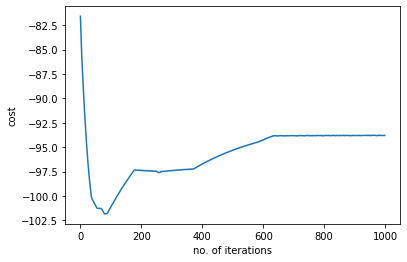

In [8]:
alpha = 0.0008
epoch = 1000
reg = 0.005 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)

In [9]:
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

accuracy of model: 66.66666666666667%


In [10]:
showPredictions(pred_y,y_test)

predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actua

[[0.15795131]
 [0.16851661]
 [0.14965964]
 [0.08487271]
 [0.22435279]] 0.08559999999999993
(1000, 1)
accuracy of model: 33.333333333333336%


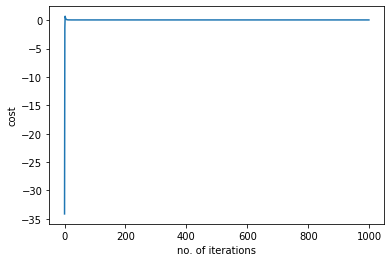

In [11]:
alpha = 0.0008
epoch = 1000
reg = 0.5 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

[[0.00900777]
 [0.00916574]
 [0.00853089]
 [0.00491462]
 [0.01174676]] 1.5631999999999584
(1000, 1)
accuracy of model: 66.66666666666667%


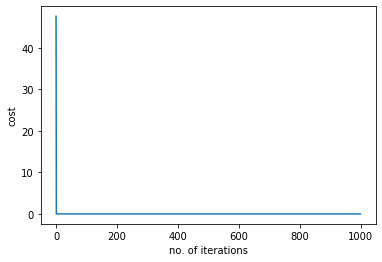

In [12]:
alpha = 0.0008
epoch = 1000
reg = 10 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

[[0.96688183]
 [1.06889935]
 [0.94272856]
 [0.79477447]
 [1.29852903]] 2.016999999999832
(1000, 1)


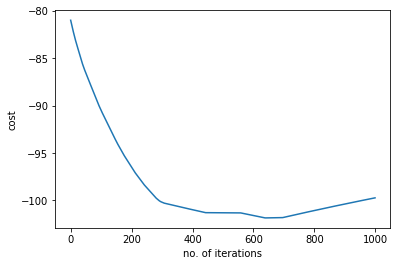

In [13]:
alpha = 0.0001
epoch = 1000
reg = 0.005 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)

In [14]:
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

accuracy of model: 66.66666666666667%


[[0.70958983]
 [0.8041902 ]
 [0.66814277]
 [0.37131024]
 [1.05579044]] 0.004699999999999999
(1000, 1)
accuracy of model: 31.57894736842105%


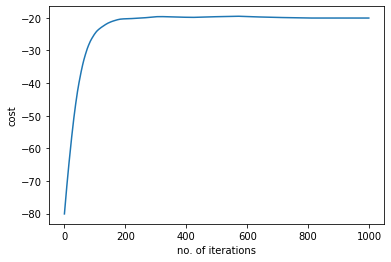

In [15]:
alpha = 0.0001
epoch = 1000
reg = 0.05 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

In [16]:
showPredictions(pred_y,y_test)

predicted:  0  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  0  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  0  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  0  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  0.0
predicted:  0  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  0  actual:  1.0
predicted:  1  actual:  0.0
predicted:  0  actual:  1.0
predicted:  1  actual:  1.0
predicted:  0  actual:  1.0
predicted:  1  actual:  0.0
predicted:  0  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  0  actual:  1.0
predicted:  1  actual:  0.0
predicted:  0  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actua

[[0.71402022]
 [0.80805424]
 [0.67153122]
 [0.36892665]
 [1.0631774 ]] 0.9100000000000006
(1000, 1)
accuracy of model: 66.66666666666667%


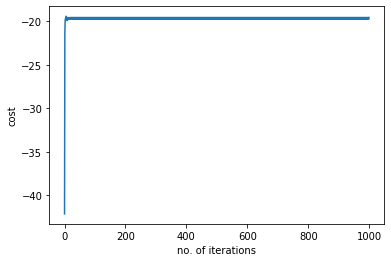

In [17]:
alpha = 0.01
epoch = 1000
reg = 0.05 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

[[0.15733695]
 [0.16812425]
 [0.14908073]
 [0.08450226]
 [0.22341104]] 0.005400000000000001
(1000, 1)
accuracy of model: 33.333333333333336%


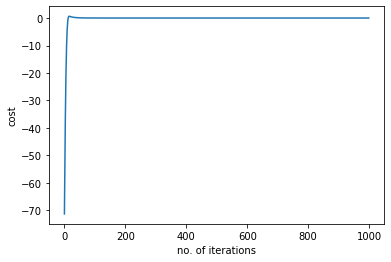

In [18]:
alpha = 0.0001
epoch = 1000
reg = 0.5 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

In [19]:
showPredictions(pred_y,y_test)

predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  0.0
predicted:  0  actual:  1.0
predicted:  0  actual:  0.0
predicted:  0  actual:  0.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  0.0
predicted:  0  actual:  0.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  0.0
predicted:  0  actual:  0.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  0.0
predicted:  0  actual:  1.0
predicted:  0  actual:  0.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  0.0
predicted:  0  actual:  1.0
predicted:  0  actual:  0.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  0.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actua